In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from shapely.geometry import Point, Polygon, MultiPoint
from shapely.wkt import loads
from sklearn.cluster import KMeans
import numpy as np

In [2]:
gdf = gpd.read_file("../data/SANGIS/BUSINESS_SITES/BUSINESS_SITES.shp")
gdf = gdf.to_crs(crs='EPSG:4326')
gdf = gdf[gdf['POINT_X']!=0]
gdf['x'] = gdf['geometry'].x
gdf['y'] = gdf['geometry'].y

In [3]:
labels = pd.read_csv('../generate_labels.csv')
final_merge = gdf.merge(labels, how='left', left_on='BUSTYPE',right_on='Items')
final_merge = final_merge[~final_merge['Categories'].isna()]

In [4]:
import geopandas as gpd
import h3pandas as h3pd
import matplotlib.pyplot as plt


Merge the data with the newly generated hexbins

## Use the 70 Largest Hexbins as 'Centers' For Clustering

In [5]:
df2 = final_merge.h3.geo_to_h3(10)
df2['lng']=df2['x']
df2['lat']=df2['y']
df2['Count']=1
df3 = df2[['lng','lat','Count']].reset_index().h3.geo_to_h3_aggregate(10, return_geometry=False).h3.h3_to_parent_aggregate(8)
df3['x'] = df3['geometry'].centroid.x
df3['y'] = df3['geometry'].centroid.y
df = df3
df['is_center'] = df['Count']>=df['Count'].sort_values(ascending=False).reset_index(drop=True)[70]
cluster_centers = df[df['is_center']==True][['x', 'y']].values
other_points = df[['x', 'y']].values
k = len(cluster_centers)
kmeans = KMeans(n_clusters=k, init=cluster_centers, n_init=1)
kmeans.fit(other_points)
df['cluster'] = kmeans.labels_
df.dissolve(by='cluster',aggfunc='sum').explore()

/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_2082/3446716280.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df3['x'] = df3['geometry'].centroid.x
/var/folders/9y/511s41v52w36jc3xv1hv8l2m0000gn/T/ipykernel_2082/3446716280.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df3['y'] = df3['geometry'].centroid.y


## Function to generate outputs on slice of data

In [6]:
import random
samples =[0]
[0]*5
range(5)
samples[random.choices(range(1), [.05], k=1)[0]]+=1
samples
list(range(5))

[0, 1, 2, 3, 4]

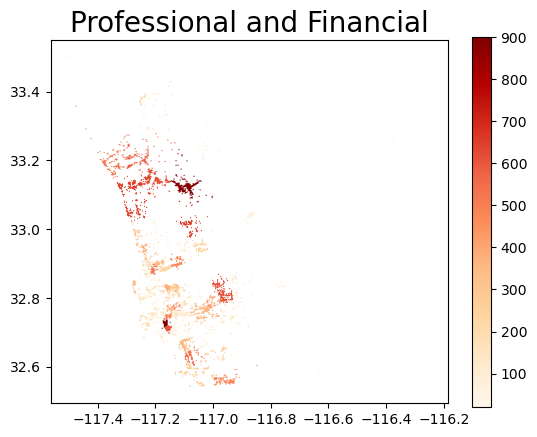

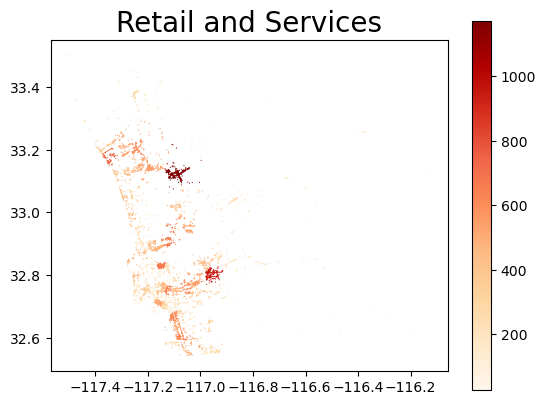

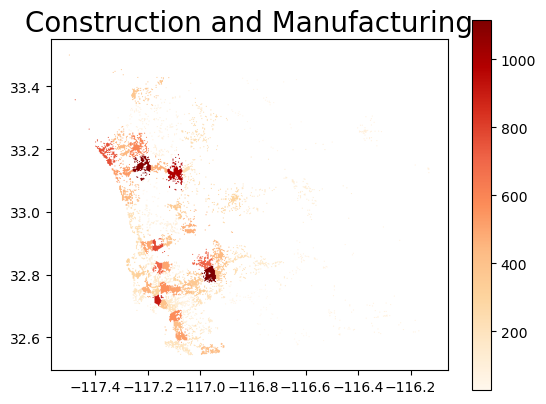

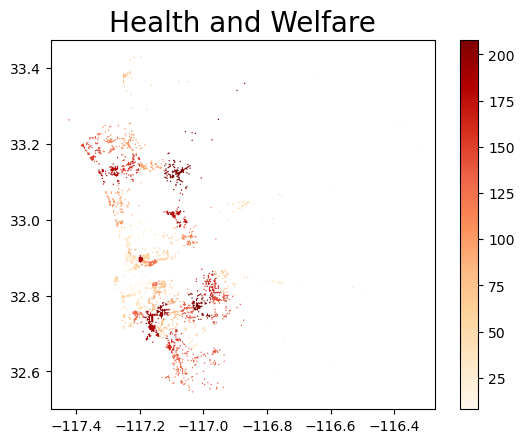

In [12]:
import warnings
warnings.filterwarnings('ignore')
for i in final_merge['Categories'].unique():
    df2 = final_merge[final_merge['Categories']==i].h3.geo_to_h3(10)
    df2['lng']=df2['x']
    df2['lat']=df2['y']
    df2['Count']=1
    df3 = df2[['lng','lat','Count']].reset_index().h3.geo_to_h3_aggregate(10, return_geometry=False).h3.h3_to_parent_aggregate(9)
    df3['x'] = df3['geometry'].centroid.x
    df3['y'] = df3['geometry'].centroid.y
    df = df3
    df['is_center'] = df['Count']>=df['Count'].sort_values(ascending=False).reset_index(drop=True)[70]
    cluster_centers = df[df['is_center']==True][['x', 'y']].values
    other_points = df[['x', 'y']].values
    k = len(cluster_centers)
    kmeans = KMeans(n_clusters=k, init=cluster_centers, n_init=1)
    kmeans.fit(other_points)
    df['cluster'] = kmeans.labels_
    df.dissolve(by='cluster',aggfunc='sum').plot(column='Count',legend=True,cmap='OrRd')
    plt.title(i,
            fontsize = 20)